In [200]:
# Flipkart_Mobiles

In [201]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [202]:
data = pd.read_csv("Flipkart_Mobiles.csv")

In [203]:
data.head()

,Brand,Model,Color,Memory,Storage,Rating,Selling_Price,Original_Price
0,OPPO,A53,Moonlight Black,4 GB,64 GB,4.5,11990,15990
1,OPPO,A53,Mint Cream,4 GB,64 GB,4.5,11990,15990
2,OPPO,A53,Moonlight Black,6 GB,128 GB,4.3,13990,17990
3,OPPO,A53,Mint Cream,6 GB,128 GB,4.3,13990,17990
4,OPPO,A53,Electric Black,4 GB,64 GB,4.5,11990,15990


In [204]:
data.tail()

,Brand,Model,Color,Memory,Storage,Rating,Selling_Price,Original_Price
3109,SAMSUNG,M52 5G,Blazing Black,6 GB,128 GB,4.3,25990,25990
3110,SAMSUNG,M52 5G,Icy Blue,6 GB,128 GB,4.3,25489,28449
3111,SAMSUNG,M52 5G,Icy Blue,8 GB,128 GB,4.3,27239,31489
3112,SAMSUNG,M52 5G,Slate Black,8 GB,128 GB,4.2,22989,22989
3113,SAMSUNG,M52 5G,Sky Blue,8 GB,128 GB,4.2,20350,22595


In [205]:
data.shape

(3114, 8)

In [206]:
data.columns

Index(['Brand', 'Model', 'Color', 'Memory', 'Storage', 'Rating',
       'Selling_Price', 'Original_Price'],
      dtype='object')

In [207]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3114 entries, 0 to 3113
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           3114 non-null   object 
 1   Model           3114 non-null   object 
 2   Color           3114 non-null   object 
 3   Memory          3071 non-null   object 
 4   Storage         3075 non-null   object 
 5   Rating          2970 non-null   float64
 6   Selling_Price   3114 non-null   int64  
 7   Original_Price  3114 non-null   int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 194.8+ KB


In [208]:
data.describe()

,Rating,Selling_Price,Original_Price
count,2970.000000,3114.000000,3114.000000
mean,4.243098,26436.625562,28333.473025
std,0.271991,30066.892622,31525.599889
min,2.300000,1000.000000,1000.000000
25%,4.100000,9990.000000,10030.250000
50%,4.300000,15000.000000,16889.500000
75%,4.400000,28999.000000,31500.000000
max,5.000000,179900.000000,189999.000000


In [209]:
data.isnull().sum()

Brand               0
Model               0
Color               0
Memory             43
Storage            39
Rating            144
Selling_Price       0
Original_Price      0
dtype: int64

In [210]:
data.dropna(inplace=True)

In [211]:
data.isnull().sum()

Brand             0
Model             0
Color             0
Memory            0
Storage           0
Rating            0
Selling_Price     0
Original_Price    0
dtype: int64

In [212]:
data.isnull().any().any()

False

In [213]:
data.nunique()

Brand              17
Model             877
Color             622
Memory             24
Storage            25
Rating             25
Selling_Price     816
Original_Price    790
dtype: int64

In [214]:
data["Brand"].unique()

array(['OPPO', 'HTC', 'IQOO', 'Google Pixel', 'LG', 'ASUS', 'realme',
       'GIONEE', 'Nokia', 'Apple', 'SAMSUNG', 'Lenovo', 'Motorola',
       'POCO', 'vivo', 'Xiaomi', 'Infinix'], dtype=object)

In [215]:
HTC_phone = data[data["Brand"] == "HTC"]
HTC_phone.head()

,Brand,Model,Color,Memory,Storage,Rating,Selling_Price,Original_Price
244,HTC,U11+,Amazing Silver,6 GB,128 GB,4.7,56990,56990
245,HTC,Wildfire X,Blue,3 GB,32 GB,3.9,12999,12999
246,HTC,Wildfire X,Blue,4 GB,128 GB,3.9,16999,16999
247,HTC,Wildfire X,Blue,4 GB,128 GB,3.9,17999,17999
248,HTC,Wildfire X,Blue MB,3 GB,32 GB,3.9,13999,13999


In [216]:
HTC_phone["Model"].value_counts()

U11                 4
Wildfire X          4
One M8              3
One E9+             3
Desire 626          3
816G                2
Desire 526G Plus    2
Desire 820          2
820S                2
Desire 516          2
626G Plus           2
620G                2
Desire 326G DS      2
Desire 616          2
Desire 826 DS       2
Desire 816          2
Desire 210          2
10                  2
U Ultra             2
Desire 700          1
U11+                1
826                 1
Desire 816G         1
526G Plus           1
820 G+              1
Desire 828          1
628                 1
Desire 630          1
One 802D            1
Name: Model, dtype: int64

In [217]:
HTC_phone["Model"].value_counts().sum()

55

In [218]:
A = HTC_phone["Memory"].str.split(" ", n=1, expand=True)

In [219]:
HTC_phone["Ram_gb"] = A[0]

C:\Users\engin\AppData\Local\Temp\ipykernel_5596\25880737.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HTC_phone["Ram_gb"] = A[0]


In [220]:
B = HTC_phone["Storage"].str.split(" ", n=1, expand=True)

In [221]:
HTC_phone["Stor_gb"] = B[0]

C:\Users\engin\AppData\Local\Temp\ipykernel_5596\3236369521.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HTC_phone["Stor_gb"] = B[0]


In [222]:
HTC_phone.head()

,Brand,Model,Color,Memory,Storage,Rating,Selling_Price,Original_Price,Ram_gb,Stor_gb
244,HTC,U11+,Amazing Silver,6 GB,128 GB,4.7,56990,56990,6,128
245,HTC,Wildfire X,Blue,3 GB,32 GB,3.9,12999,12999,3,32
246,HTC,Wildfire X,Blue,4 GB,128 GB,3.9,16999,16999,4,128
247,HTC,Wildfire X,Blue,4 GB,128 GB,3.9,17999,17999,4,128
248,HTC,Wildfire X,Blue MB,3 GB,32 GB,3.9,13999,13999,3,32


In [223]:
len(HTC_phone.index)

55

In [224]:
HTC_phone.index = range(len(HTC_phone.index))

In [225]:
HTC_phone

,Brand,Model,Color,Memory,Storage,Rating,Selling_Price,Original_Price,Ram_gb,Stor_gb
0,HTC,U11+,Amazing Silver,6 GB,128 GB,4.7,56990,56990,6,128
1,HTC,Wildfire X,Blue,3 GB,32 GB,3.9,12999,12999,3,32
2,HTC,Wildfire X,Blue,4 GB,128 GB,3.9,16999,16999,4,128
3,HTC,Wildfire X,Blue,4 GB,128 GB,3.9,17999,17999,4,128
4,HTC,Wildfire X,Blue MB,3 GB,32 GB,3.9,13999,13999,3,32
5,HTC,U11,Solar Red,6 GB,128 GB,4.6,53990,53990,6,128
6,HTC,U Ultra,Brilliant Black,4 GB,64 GB,4.0,62990,62990,4,64
7,HTC,U Ultra,Sapphire Blue,4 GB,64 GB,4.0,62990,62990,4,64
8,HTC,U11,Brilliant Black,6 GB,128 GB,4.6,53990,53990,6,128
9,HTC,U11,Amazing Silver,6 GB,128 GB,4.6,53990,53990,6,128


In [226]:
HTC_phone.drop(index=[47,48,49,50], inplace=True)

C:\Users\engin\AppData\Local\Temp\ipykernel_5596\1285984022.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HTC_phone.drop(index=[47,48,49,50], inplace=True)


In [227]:
HTC_phone.tail()

,Brand,Model,Color,Memory,Storage,Rating,Selling_Price,Original_Price,Ram_gb,Stor_gb
46,HTC,One M8,Amber Gold,2 GB,16 GB,4.4,59900,59900,2,16
51,HTC,One M8,Silver,2 GB,16 GB,4.4,59900,59900,2,16
52,HTC,One M8,Gunmetal Grey,2 GB,16 GB,4.4,59900,59900,2,16
53,HTC,Desire 700,Black,1 GB,8 GB,3.8,35490,35490,1,8
54,HTC,One 802D,Silver,2 GB,32 GB,4.1,59590,59590,2,32


In [228]:
HTC_phone.value_counts().sum()

51

In [229]:
HTC_phone.index = range(HTC_phone.value_counts().sum())
# HTC_phone.index = range(len(HTC_phone.index))

In [230]:
HTC_phone.tail()

,Brand,Model,Color,Memory,Storage,Rating,Selling_Price,Original_Price,Ram_gb,Stor_gb
46,HTC,One M8,Amber Gold,2 GB,16 GB,4.4,59900,59900,2,16
47,HTC,One M8,Silver,2 GB,16 GB,4.4,59900,59900,2,16
48,HTC,One M8,Gunmetal Grey,2 GB,16 GB,4.4,59900,59900,2,16
49,HTC,Desire 700,Black,1 GB,8 GB,3.8,35490,35490,1,8
50,HTC,One 802D,Silver,2 GB,32 GB,4.1,59590,59590,2,32


In [231]:
HTC_phone["Ram_gb"] = HTC_phone["Ram_gb"].astype(int)

C:\Users\engin\AppData\Local\Temp\ipykernel_5596\199785749.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HTC_phone["Ram_gb"] = HTC_phone["Ram_gb"].astype(int)


In [232]:
HTC_phone["Stor_gb"] = HTC_phone["Stor_gb"].astype(int)

C:\Users\engin\AppData\Local\Temp\ipykernel_5596\4036541421.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HTC_phone["Stor_gb"] = HTC_phone["Stor_gb"].astype(int)


In [233]:
HTC_phone["Title"] = HTC_phone["Brand"] + " " + HTC_phone["Model"] + " " + HTC_phone["Storage"] + " " + HTC_phone["Memory"] + " " + HTC_phone["Color"]

C:\Users\engin\AppData\Local\Temp\ipykernel_5596\2519817346.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HTC_phone["Title"] = HTC_phone["Brand"] + " " + HTC_phone["Model"] + " " + HTC_phone["Storage"] + " " + HTC_phone["Memory"] + " " + HTC_phone["Color"]


In [234]:
HTC_phone.head()

,Brand,Model,Color,Memory,Storage,Rating,Selling_Price,Original_Price,Ram_gb,Stor_gb,Title
0,HTC,U11+,Amazing Silver,6 GB,128 GB,4.7,56990,56990,6,128,HTC U11+ 128 GB 6 GB Amazing Silver
1,HTC,Wildfire X,Blue,3 GB,32 GB,3.9,12999,12999,3,32,HTC Wildfire X 32 GB 3 GB Blue
2,HTC,Wildfire X,Blue,4 GB,128 GB,3.9,16999,16999,4,128,HTC Wildfire X 128 GB 4 GB Blue
3,HTC,Wildfire X,Blue,4 GB,128 GB,3.9,17999,17999,4,128,HTC Wildfire X 128 GB 4 GB Blue
4,HTC,Wildfire X,Blue MB,3 GB,32 GB,3.9,13999,13999,3,32,HTC Wildfire X 32 GB 3 GB Blue MB


In [235]:
HTC_phone = HTC_phone.reindex(["Title","Brand","Model","Storage","Memory","Color","Stor_gb","Ram_gb","Rating","Selling_Price","Original_Price"], axis=1)

In [236]:
HTC_phone.head()

,Title,Brand,Model,Storage,Memory,Color,Stor_gb,Ram_gb,Rating,Selling_Price,Original_Price
0,HTC U11+ 128 GB 6 GB Amazing Silver,HTC,U11+,128 GB,6 GB,Amazing Silver,128,6,4.7,56990,56990
1,HTC Wildfire X 32 GB 3 GB Blue,HTC,Wildfire X,32 GB,3 GB,Blue,32,3,3.9,12999,12999
2,HTC Wildfire X 128 GB 4 GB Blue,HTC,Wildfire X,128 GB,4 GB,Blue,128,4,3.9,16999,16999
3,HTC Wildfire X 128 GB 4 GB Blue,HTC,Wildfire X,128 GB,4 GB,Blue,128,4,3.9,17999,17999
4,HTC Wildfire X 32 GB 3 GB Blue MB,HTC,Wildfire X,32 GB,3 GB,Blue MB,32,3,3.9,13999,13999


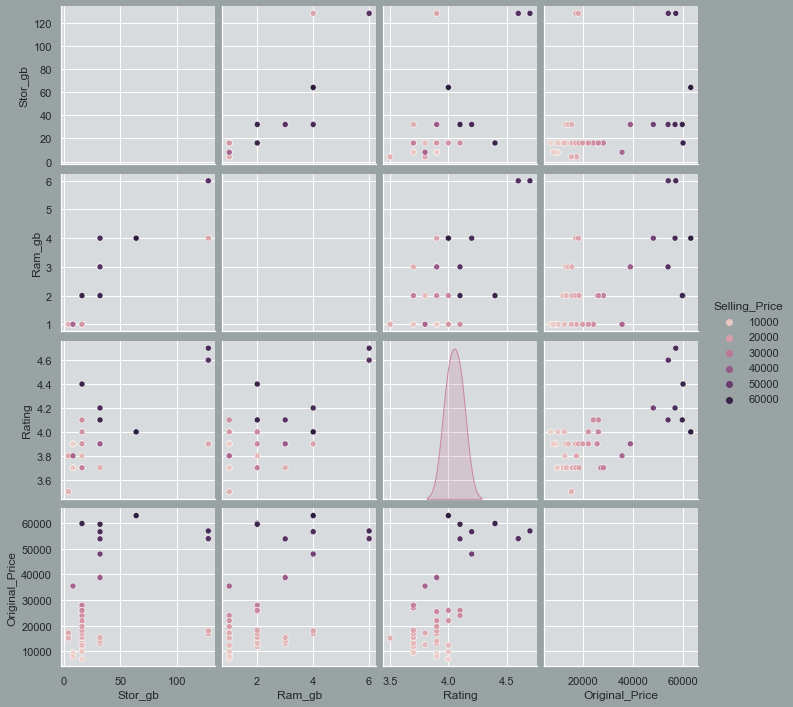

In [237]:
sns.set(rc={'axes.facecolor':'#D7DBDD', 'figure.facecolor':'#99A3A4'})
sns.pairplot(HTC_phone, hue="Selling_Price")

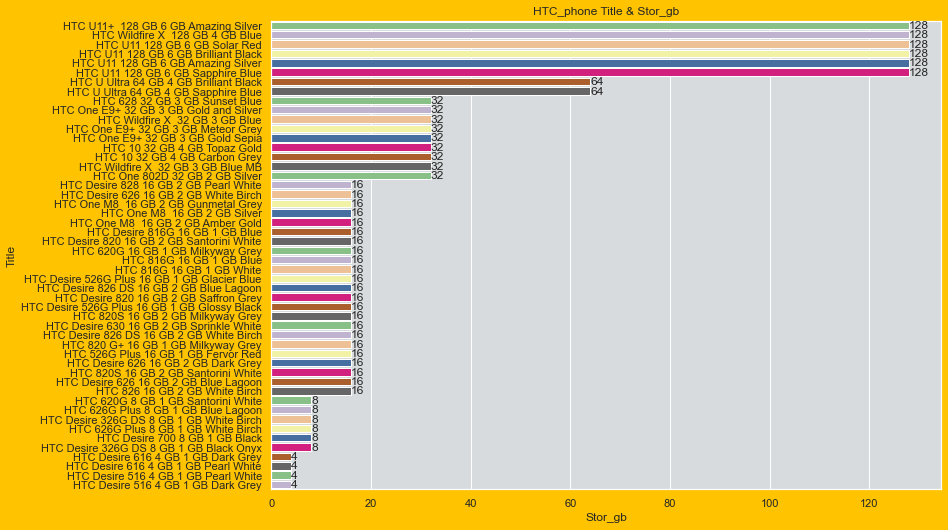

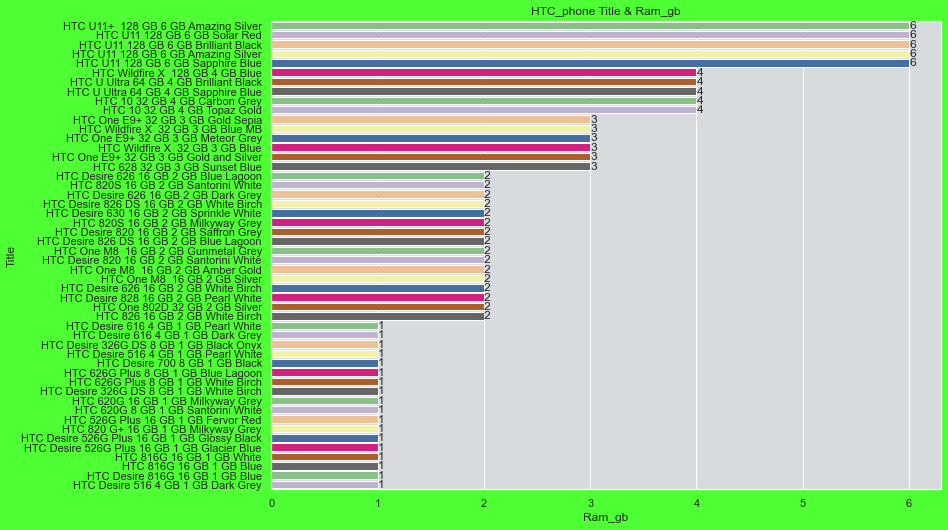

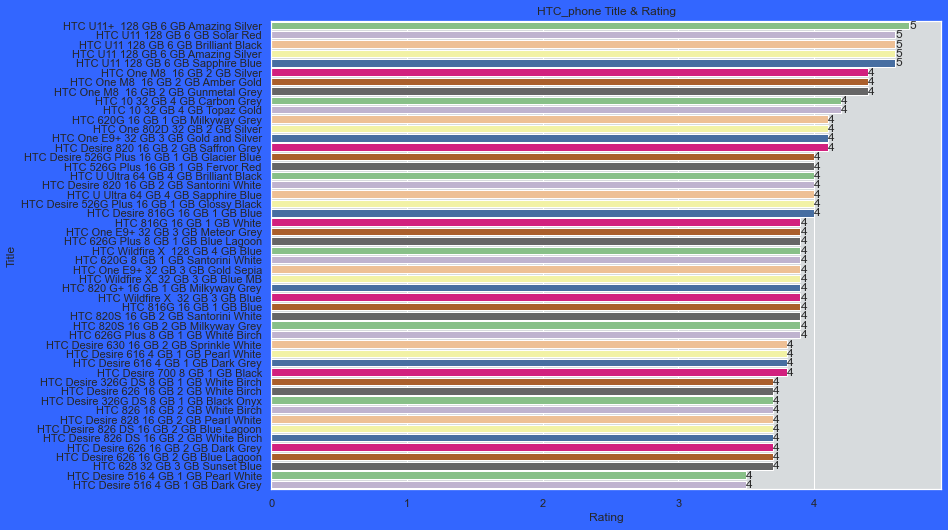

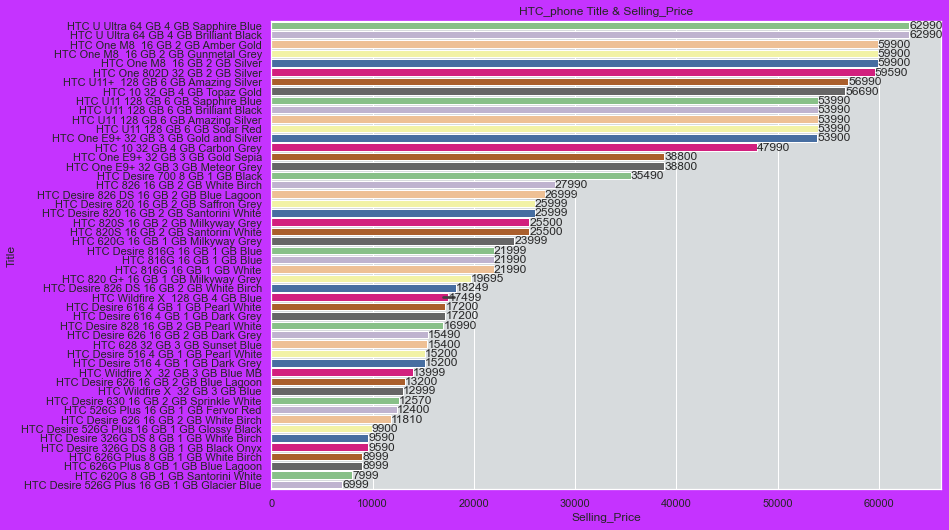

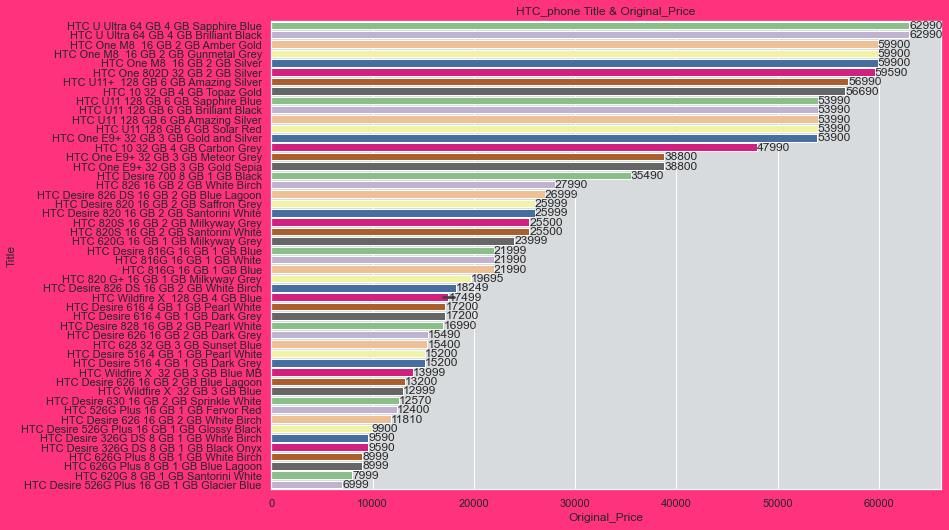

In [238]:
def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        
        ax.text(width,                              
                p.get_y() + p.get_height() / 2,      
                '{:1.0f}'.format(width),            
                ha = 'left',                         
                va = 'center')                       

plt.figure(figsize=(12,50), facecolor="#FFC300")
plt.subplot(511)
HTC_phone = HTC_phone.sort_values(by=["Stor_gb"], ascending=False)
ax=sns.barplot(x=HTC_phone.Stor_gb, y=HTC_phone.Title, palette="Accent")
plt.title("HTC_phone Title & Stor_gb")
labels(ax)

plt.figure(figsize=(12,50), facecolor="#4DFF33")
plt.subplot(512)
HTC_phone = HTC_phone.sort_values(by=["Ram_gb"], ascending=False)
ax=sns.barplot(x=HTC_phone.Ram_gb, y=HTC_phone.Title, palette="Accent")
plt.title("HTC_phone Title & Ram_gb")
labels(ax)

plt.figure(figsize=(12,50), facecolor="#3366FF")
plt.subplot(513)
HTC_phone = HTC_phone.sort_values(by=["Rating"], ascending=False)
ax=sns.barplot(x=HTC_phone.Rating, y=HTC_phone.Title, palette="Accent")
plt.title("HTC_phone Title & Rating")
labels(ax)

plt.figure(figsize=(12,50), facecolor="#C533FF")
plt.subplot(514)
HTC_phone = HTC_phone.sort_values(by=["Selling_Price"], ascending=False)
ax=sns.barplot(x=HTC_phone.Selling_Price, y=HTC_phone.Title, palette="Accent")
plt.title("HTC_phone Title & Selling_Price")
labels(ax)

plt.figure(figsize=(12,50), facecolor="#FF337D")
plt.subplot(515)
HTC_phone = HTC_phone.sort_values(by=["Original_Price"], ascending=False)
ax=sns.barplot(x=HTC_phone.Original_Price, y=HTC_phone.Title, palette="Accent")
plt.title("HTC_phone Title & Original_Price")
labels(ax)

In [239]:
HTC_phone.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 7 to 35
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Title           51 non-null     object 
 1   Brand           51 non-null     object 
 2   Model           51 non-null     object 
 3   Storage         51 non-null     object 
 4   Memory          51 non-null     object 
 5   Color           51 non-null     object 
 6   Stor_gb         51 non-null     int32  
 7   Ram_gb          51 non-null     int32  
 8   Rating          51 non-null     float64
 9   Selling_Price   51 non-null     int64  
 10  Original_Price  51 non-null     int64  
dtypes: float64(1), int32(2), int64(2), object(6)
memory usage: 4.4+ KB


In [240]:
# "Selling_Price" Metrics For Linear Regression

In [241]:
HTC_phone.head(1)

,Title,Brand,Model,Storage,Memory,Color,Stor_gb,Ram_gb,Rating,Selling_Price,Original_Price
7,HTC U Ultra 64 GB 4 GB Sapphire Blue,HTC,U Ultra,64 GB,4 GB,Sapphire Blue,64,4,4.0,62990,62990


In [242]:
x = HTC_phone.drop(["Title", "Brand", "Model", "Storage", "Memory", "Color", "Selling_Price", "Original_Price"], axis = 1)
y = HTC_phone["Selling_Price"]

In [243]:
x.shape

(51, 3)

In [244]:
y.shape

(51,)

In [245]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [246]:
x_train.shape

(40, 3)

In [247]:
x_test.shape

(11, 3)

In [248]:
y_train.shape

(40,)

In [249]:
y_test.shape

(11,)

In [250]:
model_lin=LinearRegression()
model_lin.fit(x,y)

LinearRegression()

In [251]:
Trn_Acc_Sel_Prc = model_lin.score(x_train, y_train)
Tst_Acc_Sel_Prc = model_lin.score(x_test, y_test)
print("Trn_Acc_Sel_Prc: ", Trn_Acc_Sel_Prc)
print("Tst_Acc_Sel_Prc: ", Tst_Acc_Sel_Prc)

Trn_Acc_Sel_Prc:  0.6073181030703303
Tst_Acc_Sel_Prc:  0.7134746625159907


In [252]:
Coef_Sel_Prc = model_lin.coef_
Intrcpt_Sel_Prc = model_lin.intercept_
Pre_Sel_Prc = model_lin.predict(x)
print("Coef_Sel_Prc: ", Coef_Sel_Prc)
print("Intrcpt_Sel_Prc: ", Intrcpt_Sel_Prc)

Coef_Sel_Prc:  [ -304.51462473  9836.71170633 38703.66446993]
Intrcpt_Sel_Prc:  -138028.38909011887


In [253]:
mse_Sel_Prc = mean_squared_error(y,model_lin.predict(x))
print("mse_Sel_Prc: ", mse_Sel_Prc)

mse_Sel_Prc:  118429028.4554226


In [254]:
# "Original_Price" Metrics For Linear Regression

In [255]:
HTC_phone.head(1)

,Title,Brand,Model,Storage,Memory,Color,Stor_gb,Ram_gb,Rating,Selling_Price,Original_Price
7,HTC U Ultra 64 GB 4 GB Sapphire Blue,HTC,U Ultra,64 GB,4 GB,Sapphire Blue,64,4,4.0,62990,62990


In [256]:
x = HTC_phone.drop(["Title", "Brand", "Model", "Storage", "Memory", "Color", "Selling_Price", "Original_Price"], axis = 1)
y = HTC_phone["Original_Price"]

In [257]:
x.shape

(51, 3)

In [258]:
y.shape

(51,)

In [259]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [260]:
model_lin=LinearRegression()
model_lin.fit(x,y)

LinearRegression()

In [261]:
Trn_Acc_Org_Prc = model_lin.score(x_train, y_train)
Tst_Acc_Org_Prc = model_lin.score(x_test, y_test)
print("Trn_Acc_Org_Prc: ", Trn_Acc_Org_Prc)
print("Tst_Acc_Org_Prc: ", Tst_Acc_Org_Prc)

Trn_Acc_Org_Prc:  0.6753959896746453
Tst_Acc_Org_Prc:  0.5991648951478347


In [262]:
Coef_Org_Prc = model_lin.coef_
Intrcpt_Org_Prc = model_lin.intercept_
Pre_Org_Prc = model_lin.predict(x)
print("Coef_Org_Prc: ", Coef_Org_Prc)
print("Intrcpt_Org_Prc: ", Intrcpt_Org_Prc)

Coef_Org_Prc:  [ -304.51462473  9836.71170633 38703.66446993]
Intrcpt_Org_Prc:  -138028.38909011887


In [263]:
mse_Org_Prc = mean_squared_error(y,model_lin.predict(x))
print("mse_Org_Prc: ", mse_Org_Prc)

mse_Org_Prc:  118429028.4554226


In [264]:
# "Stor_gb" Metrics For Linear Regression

In [265]:
HTC_phone.head(1)

,Title,Brand,Model,Storage,Memory,Color,Stor_gb,Ram_gb,Rating,Selling_Price,Original_Price
7,HTC U Ultra 64 GB 4 GB Sapphire Blue,HTC,U Ultra,64 GB,4 GB,Sapphire Blue,64,4,4.0,62990,62990


In [266]:
x = HTC_phone.drop(["Title", "Brand", "Model", "Storage", "Memory", "Color", "Stor_gb", "Selling_Price", "Original_Price"], axis = 1)
y = HTC_phone["Stor_gb"]

In [267]:
x.shape

(51, 2)

In [268]:
y.shape

(51,)

In [269]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [270]:
model_lin=LinearRegression()
model_lin.fit(x,y)

LinearRegression()

In [271]:
Trn_Acc_Stor_gb = model_lin.score(x_train, y_train)
Tst_Acc_Stor_gb = model_lin.score(x_test, y_test)
print("Trn_Acc_Stor_gb: ", Trn_Acc_Stor_gb)
print("Tst_Acc_Stor_gb: ", Tst_Acc_Stor_gb)

Trn_Acc_Stor_gb:  0.7623738604165915
Tst_Acc_Stor_gb:  0.9521615415155346


In [272]:
Coef_Stor_gb = model_lin.coef_
Intrcpt_Stor_gb = model_lin.intercept_
Pre_Stor_gb = model_lin.predict(x)
print("Coef_Stor_gb: ", Coef_Stor_gb)
print("Intrcpt_Stor_gb: ", Intrcpt_Stor_gb)

Coef_Stor_gb:  [22.21346707  6.71681008]
Intrcpt_Stor_gb:  -45.66438722263916


In [273]:
mse_Stor_gb = mean_squared_error(y,model_lin.predict(x))
print("mse_Stor_gb: ", mse_Stor_gb)

mse_Stor_gb:  289.0059087959309


In [274]:
# "Ram_gb" Metrics For Linear Regression

In [275]:
HTC_phone.head(1)

,Title,Brand,Model,Storage,Memory,Color,Stor_gb,Ram_gb,Rating,Selling_Price,Original_Price
7,HTC U Ultra 64 GB 4 GB Sapphire Blue,HTC,U Ultra,64 GB,4 GB,Sapphire Blue,64,4,4.0,62990,62990


In [276]:
x = HTC_phone.drop(["Title", "Brand", "Model", "Storage", "Memory", "Color", "Ram_gb", "Selling_Price", "Original_Price"], axis = 1)
y = HTC_phone["Ram_gb"]

In [277]:
x.shape

(51, 2)

In [278]:
y.shape

(51,)

In [279]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [280]:
model_lin=LinearRegression()
model_lin.fit(x,y)

LinearRegression()

In [281]:
Trn_Acc_Ram_gb = model_lin.score(x_train, y_train)
Tst_Acc_Ram_gb = model_lin.score(x_test, y_test)
print("Trn_Acc_Ram_gb: ", Trn_Acc_Ram_gb)
print("Tst_Acc_Ram_gb: ", Tst_Acc_Ram_gb)

Trn_Acc_Ram_gb:  0.8610648476150233
Tst_Acc_Ram_gb:  0.58346021498472


In [282]:
Coef_Ram_gb = model_lin.coef_
Intrcpt_Ram_gb = model_lin.intercept_
Pre_Ram_gb = model_lin.predict(x)
print("Coef_Ram_gb: ", Coef_Ram_gb)
print("Intrcpt_Ram_gb: ", Intrcpt_Ram_gb)

Coef_Ram_gb:  [0.03073459 0.95000322]
Intrcpt_Ram_gb:  -2.4383681525556953


In [283]:
mse_Ram_gb = mean_squared_error(y,model_lin.predict(x))
print("mse_Ram_gb: ", mse_Ram_gb)

mse_Ram_gb:  0.3998690316676492


In [284]:
# "Rating" Metrics For Linear Regression

In [285]:
HTC_phone.head(1)

,Title,Brand,Model,Storage,Memory,Color,Stor_gb,Ram_gb,Rating,Selling_Price,Original_Price
7,HTC U Ultra 64 GB 4 GB Sapphire Blue,HTC,U Ultra,64 GB,4 GB,Sapphire Blue,64,4,4.0,62990,62990


In [286]:
x = HTC_phone.drop(["Title", "Brand", "Model", "Storage", "Memory", "Color", "Rating", "Selling_Price", "Original_Price"], axis = 1)
y = HTC_phone["Rating"]

In [287]:
x.shape

(51, 2)

In [288]:
y.shape

(51,)

In [289]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [290]:
model_lin=LinearRegression()
model_lin.fit(x,y)

LinearRegression()

In [291]:
Trn_Acc_Rating = model_lin.score(x_train, y_train)
Tst_Acc_Rating = model_lin.score(x_test, y_test)
print("Trn_Acc_Rating: ", Trn_Acc_Rating)
print("Tst_Acc_Rating: ", Tst_Acc_Rating)

Trn_Acc_Rating:  0.4782027902471787
Tst_Acc_Rating:  0.42395750803349697


In [292]:
Coef_Rating = model_lin.coef_
Intrcpt_Rating = model_lin.intercept_
Pre_Rating = model_lin.predict(x)
print("Coef_Rating: ", Coef_Rating)
print("Intrcpt_Rating: ", Intrcpt_Rating)

Coef_Rating:  [0.00101836 0.10410054]
Intrcpt_Rating:  3.6945825780009685


In [293]:
mse_Rating = mean_squared_error(y,model_lin.predict(x))
print("mse_Rating: ", mse_Rating)

mse_Rating:  0.043817306129887754


In [294]:
# "ALL" Metrics For Linear Regression

In [295]:
# Selling_Price Metrics For Linear Regression
print()
print("Trn_Acc_Sel_Prc".ljust(20), ":", Trn_Acc_Sel_Prc)
print("Tst_Acc_Sel_Prc".ljust(20), ":", Tst_Acc_Sel_Prc)
print("Coef_Sel_Prc".ljust(20), ":", Coef_Sel_Prc)
print("Intrcpt_Sel_Prc".ljust(20), ":", Intrcpt_Sel_Prc)
print("mse_Sel_Prc".ljust(20), ":", mse_Sel_Prc)
print()
# Original_Price Metrics For Linear Regression
print("Trn_Acc_Org_Prc".ljust(20), ":", Trn_Acc_Org_Prc)
print("Tst_Acc_Org_Prc".ljust(20), ":", Tst_Acc_Org_Prc)
print("Coef_Org_Prc".ljust(20), ":", Coef_Org_Prc)
print("Intrcpt_Org_Prc".ljust(20), ":", Intrcpt_Org_Prc)
print("mse_Org_Prc".ljust(20), ":", mse_Org_Prc)
print()
# Stor_gb Metrics For Linear Regression
print("Trn_Acc_Stor_gb".ljust(20), ":", Trn_Acc_Stor_gb)
print("Tst_Acc_Stor_gb".ljust(20), ":", Tst_Acc_Stor_gb)
print("Coef_Stor_gb".ljust(20), ":", Coef_Stor_gb)
print("Intrcpt_Stor_gb".ljust(20), ":", Intrcpt_Stor_gb)
print("mse_Stor_gb".ljust(20), ":", mse_Stor_gb)
print()
# Ram_gb Metrics For Linear Regression
print("Trn_Acc_Ram_gb".ljust(20), ":", Trn_Acc_Ram_gb)
print("Tst_Acc_Ram_gb".ljust(20), ":", Tst_Acc_Ram_gb)
print("Coef_Ram_gb".ljust(20), ":", Coef_Ram_gb)
print("Intrcpt_Ram_gb".ljust(20), ":", Intrcpt_Ram_gb)
print("mse_Ram_gb".ljust(20), ":", mse_Ram_gb)
print()
# Rating Metrics For Linear Regression
print("Trn_Acc_Rating:".ljust(20), ":", Trn_Acc_Rating)
print("Tst_Acc_Rating".ljust(20), ":", Tst_Acc_Rating)
print("Coef_Rating".ljust(20), ":", Coef_Rating)
print("Intrcpt_Rating".ljust(20), ":", Intrcpt_Rating)
print("mse_Rating".ljust(20), ":", mse_Rating)


Trn_Acc_Sel_Prc      : 0.6073181030703303
Tst_Acc_Sel_Prc      : 0.7134746625159907
Coef_Sel_Prc         : [ -304.51462473  9836.71170633 38703.66446993]
Intrcpt_Sel_Prc      : -138028.38909011887
mse_Sel_Prc          : 118429028.4554226

Trn_Acc_Org_Prc      : 0.6753959896746453
Tst_Acc_Org_Prc      : 0.5991648951478347
Coef_Org_Prc         : [ -304.51462473  9836.71170633 38703.66446993]
Intrcpt_Org_Prc      : -138028.38909011887
mse_Org_Prc          : 118429028.4554226

Trn_Acc_Stor_gb      : 0.7623738604165915
Tst_Acc_Stor_gb      : 0.9521615415155346
Coef_Stor_gb         : [22.21346707  6.71681008]
Intrcpt_Stor_gb      : -45.66438722263916
mse_Stor_gb          : 289.0059087959309

Trn_Acc_Ram_gb       : 0.8610648476150233
Tst_Acc_Ram_gb       : 0.58346021498472
Coef_Ram_gb          : [0.03073459 0.95000322]
Intrcpt_Ram_gb       : -2.4383681525556953
mse_Ram_gb           : 0.3998690316676492

Trn_Acc_Rating:      : 0.4782027902471787
Tst_Acc_Rating       : 0.42395750803349697
Coef